In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import statistics as st
from sklearn.linear_model import LinearRegression
from datetime import datetime 

In [2]:
data = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
display(data)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,94,110,110,120,170,174,237,273,281,299
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,174,186,197,212,223,243,259,277,304,333
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,367,409,454,511,584,716,847,986,1171,1251
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,224,267,308,334,370,376,390,428,439,466
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,4,4,5,7,7,7,8,8,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,...,0,0,0,0,0,2,2,3,3,3
255,NaN,Sierra Leone,8.460555,-11.779889,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,2,4
256,"Bonaire, Sint Eustatius and Saba",Netherlands,12.178400,-68.238500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2
257,NaN,Malawi,-13.254308,34.301525,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,3,4


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,53,62,71,77,78,80,84,87,91,93
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,1219,1405,1617,1791,2032,2032,2182,2298,2389,2493
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,12,12,15,15,15,17,19,21,22,26
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,493,555,625,656,689,743,781,835,873,900
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,235,257,287,299,305,337,367,367,396,407
13,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,...,47,47,62,66,66,69,69,72,74,80
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,520,574,685,769,821,917,968,1036,1085,1115
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,231,231,278,311,355,364,392,400,400,436


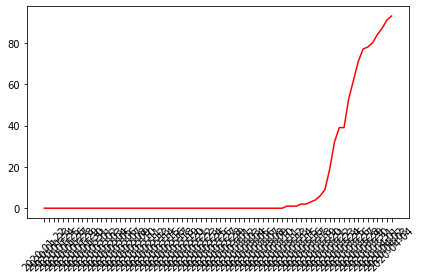

In [5]:
japan = data[data["Country/Region"] == "Australia"]
display(japan)
time_ser = japan.iloc[:,4:]
#display(list(time_ser.iloc[0]))
fig, ax = plt.subplots()
fig.canvas.draw()
col = time_ser.iloc[0]
dates=list(time_ser)
date_object = datetime.strptime(dates[0], '%m/%d/%y')
x_values = [datetime.strptime(str(d),"%m/%d/%y").date() for d in dates]

plt.plot(dates, col, c = "red")

ax.set_xticklabels(x_values, rotation=45)
plt.tight_layout()

plt.show()


In [6]:
da = pd.read_csv("csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv")
au = da[da["Country_Region"] == "Australia"]
display(au)
T_R=sum(list(da["Recovered"]))
T_D=sum(list(da["Deaths"]))
T_C=sum(list(da["Confirmed"]))
AU_R=sum(list(au["Recovered"]))
AU_D=sum(list(au["Deaths"]))
AU_C=sum(list(au["Confirmed"]))
print("Confirmed in AU: ",sum(list(au["Confirmed"])))
print("Recovered in AU: ",sum(list(au["Recovered"])))
print("Deaths in AU:    ",sum(list(au["Deaths"])))
print("Total Confirmed: ",sum(list(da["Confirmed"])))
print("Total Recovered: ",sum(list(da["Recovered"])))
print("Total Deaths:    ",sum(list(da["Deaths"])))
print("Total Active:    ",sum(list(da["Active"])))
print("Recover Rate:    ",np.round(T_R*100/T_C,3),"%")
print("Deaths Rate:     ",np.round(T_D*100/T_C,3),"%")
print("AU Recover Rate: ",np.round(AU_R*100/AU_C,3),"%")
print("AU Deaths Rate:  ",np.round(AU_D*100/AU_C,3),"%")        

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
2417,NaN,NaN,Australian Capital Territory,Australia,2020-04-04 23:41:02,-35.4735,149.0124,93,2,18,73,"Australian Capital Territory, Australia"
2464,NaN,NaN,New South Wales,Australia,2020-04-04 23:41:02,-33.8688,151.2093,2493,12,4,2477,"New South Wales, Australia"
2468,NaN,NaN,Northern Territory,Australia,2020-04-04 23:41:02,-12.4634,130.8456,26,0,1,25,"Northern Territory, Australia"
2476,NaN,NaN,Queensland,Australia,2020-04-04 23:41:02,-27.4698,153.0251,900,4,8,888,"Queensland, Australia"
2488,NaN,NaN,South Australia,Australia,2020-04-04 23:41:02,-34.9285,138.6007,407,0,46,361,"South Australia, Australia"
2490,NaN,NaN,Tasmania,Australia,2020-04-04 23:41:02,-42.8821,147.3272,80,2,5,73,"Tasmania, Australia"
2494,NaN,NaN,Victoria,Australia,2020-04-04 23:41:02,-37.8136,144.9631,1115,8,527,580,"Victoria, Australia"
2496,NaN,NaN,Western Australia,Australia,2020-04-04 23:41:02,-31.9505,115.8605,436,2,92,342,"Western Australia, Australia"


Confirmed in AU:  5550
Recovered in AU:  701
Deaths in AU:     30
Total Confirmed:  1197405
Total Recovered:  246152
Total Deaths:     64606
Total Active:     590673
Recover Rate:     20.557 %
Deaths Rate:      5.396 %
AU Recover Rate:  12.631 %
AU Deaths Rate:   0.541 %
